In [152]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os
from random import choice
import copy

In [153]:
BASE_WORKDIR='data/iops2/'



In [154]:

def read_values(backend, test_subject, test_type, mix_type, vars_dict):

    for var in vars_dict.keys():

        path = BASE_WORKDIR + '/' + backend + '/' + test_subject + '/' + test_type + '/' + str(var) + '/' + mix_type + '/'
        
        for filename in os.listdir(path):
            f = open(path + filename, 'r')
            value = f.read().strip('\n')
            vars_dict[var].append(int(value))
            
            
            f.close()
            
    return vars_dict
            
            
            
            
def plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, figname):
    
    x = np.arange(1,len(x_labels)+1)

    plt.bar(x-0.125, y_host, color='r', width = 0.25)
    plt.bar(x+0.125, y_pod, color='b', width = 0.25)
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(x, x_labels)
    
    red_patch = mpatches.Patch(color='red', label='Host')
    blue_patch = mpatches.Patch(color='blue', label='Pod')
    plt.legend(handles=[red_patch,blue_patch])


    plt.savefig(figname)
    plt.show()


def take_median(vars_dict):
    medians_list = []
    #print sorted(vars_dict.keys())
    for key in sorted(vars_dict.keys()):
        median = np.median(vars_dict[key]) 
    #    print vars_dict[key]
    #    print median
        medians_list.append(median)
     #   print medians_list
        
    return np.asarray(medians_list)

def take_mean(vars_dict):
    means_list = []
    for key in sorted(vars_dict.keys()):
        mean = np.mean(vars_dict[key]) 
    #    print vars_dict[key]
    #    print median
        means_list.append(mean)
     #   print medians_list
        
    return means_list

def take_std(vars_dict):
    stds_list = []
    for key in sorted(vars_dict.keys()):
        std = np.std(vars_dict[key]) 
    #    print vars_dict[key]
    #    print median
        stds_list.append(std)
     #   print medians_list
        
    return stds_list
    
    

    
    


            



    

In [186]:
# test code

# get read IOPS from blocksize test on host using gluster
host_gluster_bs_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_gluster_bs_read_iops = read_values('gluster','host','test_bs', 'read', host_gluster_bs_read_dict)



host_gluster_bs_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_gluster_bs_write_iops = read_values('gluster','host','test_bs', 'write', host_gluster_bs_write_dict)

#pod_gluster_bs_read_dict = { "4": [], "8": [], "16": [], "32": [], "64": [] }
#pod_gluster_bs_read_iops = read_values('gluster','pod','test_bs', 'read', pod_gluster_bs_read_dict)


In [193]:
# GLUSTER HOST RAMPTIME

host_gluster_rt_read_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_gluster_rt_read_iops = read_values('gluster','host','test_rt', 'read', host_gluster_rt_read_dict)


host_gluster_rt_write_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_gluster_rt_write_iops = read_values('gluster','host','test_rt', 'write', host_gluster_rt_write_dict)

In [7]:
# GLUSTER HOST IODEPTH

host_gluster_depth_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_gluster_depth_read_iops = read_values('gluster','host','test_depth', 'read', host_gluster_depth_read_dict)


host_gluster_depth_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_gluster_depth_write_iops = read_values('gluster','host','test_depth', 'write', host_gluster_depth_write_dict)

In [8]:
# GLUSTER POD BLOCKSIZE

pod_gluster_bs_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_gluster_bs_read_iops = read_values('gluster','pod','test_bs', 'read', pod_gluster_bs_read_dict)




pod_gluster_bs_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_gluster_bs_write_iops = read_values('gluster','pod','test_bs', 'write', pod_gluster_bs_write_dict)










In [192]:
# GLUSTER POD RAMPTIME

pod_gluster_rt_read_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
pod_gluster_rt_read_iops = read_values('gluster','pod','test_rt', 'read', pod_gluster_rt_read_dict)


pod_gluster_rt_write_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
pod_gluster_rt_write_iops = read_values('gluster','pod','test_rt', 'write', pod_gluster_rt_write_dict)

In [10]:
# GLUSTER POD IODEPTH

pod_gluster_depth_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_gluster_depth_read_iops = read_values('gluster','pod','test_depth', 'read', pod_gluster_depth_read_dict)


pod_gluster_depth_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_gluster_depth_write_iops = read_values('gluster','pod','test_depth', 'write', pod_gluster_depth_write_dict)

In [11]:
######### RBD ##############

In [12]:
# RBD HOST BLOCKSIZE

host_rbd_bs_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_rbd_bs_read_iops = read_values('rbd','host','test_bs', 'read', host_rbd_bs_read_dict)




host_rbd_bs_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_rbd_bs_write_iops = read_values('rbd','host','test_bs', 'write', host_rbd_bs_write_dict)




In [13]:
# RBD POD BLOCKSIZE

pod_rbd_bs_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_rbd_bs_read_iops = read_values('rbd','pod','test_bs', 'read', pod_rbd_bs_read_dict)




pod_rbd_bs_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_rbd_bs_write_iops = read_values('rbd','pod','test_bs', 'write', pod_rbd_bs_write_dict)




In [160]:
# RBD HOST RAMPTIME

host_rbd_rt_read_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_rbd_rt_read_iops = read_values('rbd','host','test_rt', 'read', host_rbd_rt_read_dict)


host_rbd_rt_write_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_rbd_rt_write_iops = read_values('rbd','host','test_rt', 'write', host_rbd_rt_write_dict)

In [176]:
# RBD HOST RAMPTIME

host_rbd_rt_read_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_rbd_rt_read_iops = read_values('rbd','host','test_rt', 'read', host_rbd_rt_read_dict)


host_rbd_rt_write_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
host_rbd_rt_write_iops = read_values('rbd','host','test_rt', 'write', host_rbd_rt_write_dict)

In [211]:
# RBD POD RAMPTIME

pod_rbd_rt_read_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
pod_rbd_rt_read_iops = read_values('rbd','pod','test_rt', 'read', pod_rbd_rt_read_dict)


pod_rbd_rt_write_dict = { 10: [], 20: [], 30: [], 40: [], 50: [], 60: [] }
pod_rbd_rt_write_iops = read_values('rbd','pod','test_rt', 'write', pod_rbd_rt_write_dict)

In [120]:
# RBD HOST IODEPTH

host_rbd_depth_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_rbd_depth_read_iops = read_values('rbd','host','test_depth', 'read', host_rbd_depth_read_dict)


host_rbd_depth_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
host_rbd_depth_write_iops = read_values('rbd','host','test_depth', 'write', host_rbd_depth_write_dict)

In [18]:
# RBD POD IODEPTH

pod_rbd_depth_read_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_rbd_depth_read_iops = read_values('rbd','pod','test_depth', 'read', pod_rbd_depth_read_dict)


pod_rbd_depth_write_dict = { 4: [], 8: [], 16: [], 32: [], 64: [] }
pod_rbd_depth_write_iops = read_values('rbd','pod','test_depth', 'write', pod_rbd_depth_write_dict)

In [19]:
################# PLOTS #################

Host gluster read bs medians:  [ 2285.  2217.  2108.  1958.  1652.]
Host gluster read bs means:  [2256.2596153846152, 2206.7029702970299, 2102.09900990099, 1958.6039603960396, 1646.5544554455446]
Host gluster read bs stds:  [176.26667925401185, 64.517177780813526, 47.429678002863859, 36.520733080146442, 43.15628408918716]
Pod gluster read bs medians:  [ 2009.  1905.  1715.  1419.   936.]
Pod gluster read bs means:  [1998.2376237623762, 1916.5049504950496, 1692.2475247524753, 1472.9306930693069, 1115.7524752475247]
Pod gluster read bs stds:  [57.557057100552562, 51.123152369213948, 147.49320547804899, 123.93365020039917, 211.56107214312465]


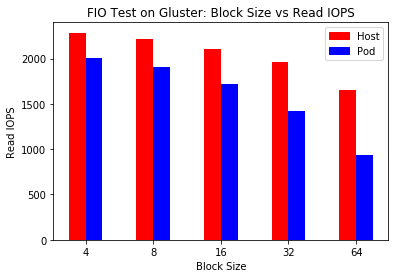

Host gluster write bs medians:  [ 977.5  949.   910.   836.   714. ]
Host gluster write bs means:  [966.75, 944.64646464646466, 907.13861386138615, 836.34653465346537, 711.30693069306926]
Host gluster write bs stds:  [75.643362360690773, 27.630795705872448, 20.492949622180639, 15.643576889329486, 18.588158998023193]
Pod gluster write bs medians:  [ 858.  815.  740.  606.  404.]
Pod gluster write bs means:  [853.63366336633658, 820.48514851485152, 730.44554455445541, 628.90099009900985, 481.88118811881191]
Pod gluster write bs stds:  [23.708929166525245, 21.836300896881127, 62.934584181430793, 52.915494923321845, 91.409565451401832]


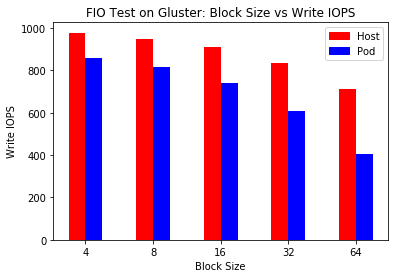

In [86]:
# GLUSTER BLOCK SIZE READ
x_labels = sorted(host_gluster_bs_read_dict.keys())

xlabel = "Block Size"
y_host = take_median(host_gluster_bs_read_iops)
y_pod = take_median(pod_gluster_bs_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on Gluster: Block Size vs Read IOPS"

 

# host
host_gluster_bs_read_medians = copy.deepcopy(y_host)
host_gluster_bs_read_means = take_mean(host_gluster_bs_read_iops)
host_gluster_bs_read_stds = take_std(host_gluster_bs_read_iops)
# pod
pod_gluster_bs_read_medians = copy.deepcopy(y_pod)
pod_gluster_bs_read_means = take_mean(pod_gluster_bs_read_iops)
pod_gluster_bs_read_stds = take_std(pod_gluster_bs_read_iops)

print "Host gluster read bs medians: ", y_host
print "Host gluster read bs means: ", host_gluster_bs_read_means
print "Host gluster read bs stds: ", host_gluster_bs_read_stds

print "Pod gluster read bs medians: ", y_pod
print "Pod gluster read bs means: ", pod_gluster_bs_read_means
print "Pod gluster read bs stds: ", pod_gluster_bs_read_stds
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "gluster_bs_read" )



# GLUSTER BLOCK SIZE WRITE
x_labels = sorted(host_gluster_bs_read_dict.keys())

xlabel = "Block Size"
y_host = take_median(host_gluster_bs_write_iops)
y_pod = take_median(pod_gluster_bs_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on Gluster: Block Size vs Write IOPS"

# means
host_gluster_bs_write_medians = copy.deepcopy(y_host)
host_gluster_bs_write_means = take_mean(host_gluster_bs_write_iops)
host_gluster_bs_write_stds = take_std(host_gluster_bs_write_iops)
# std
pod_gluster_bs_write_medians = copy.deepcopy(y_pod)
pod_gluster_bs_write_means = take_mean(pod_gluster_bs_write_iops)
pod_gluster_bs_write_stds = take_std(pod_gluster_bs_write_iops)


print "Host gluster write bs medians: ", y_host
print "Host gluster write bs means: ", host_gluster_bs_write_means
print "Host gluster write bs stds: ", host_gluster_bs_write_stds

print "Pod gluster write bs medians: ", y_pod
print "Pod gluster write bs means: ", pod_gluster_bs_write_means
print "Pod gluster write bs stds: ", pod_gluster_bs_write_stds
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "gluster_bs_write" )



Host RBD read bs medians:  [ 6863.  6724.  6335.  5653.  4419.]
Host RBD read bs means:  [6883.029702970297, 6694.7920792079212, 6318.5841584158416, 5642.257425742574, 4413.7524752475247]
Host RBD read bs stds:  [147.61989290437754, 190.66030737557355, 192.46433473525377, 214.96804521756329, 282.84570211821222]
Pod RBD read bs medians:  [ 6654.  6424.  6058.  5356.  4165.]
Pod RBD read bs means:  [6665.3168316831679, 6426.5445544554459, 6049.5148514851489, 5333.0099009900987, 4169.9504950495048]
Pod RBD read bs stds:  [107.43516863331439, 112.96670189782817, 188.35618322643779, 224.72312976301581, 262.12582483286417]


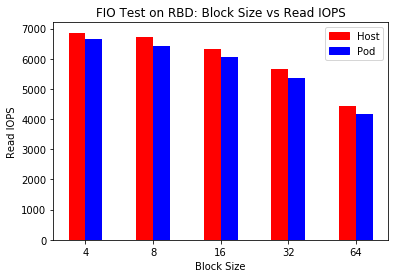

Host RBD write bs medians:  [ 2943.  2879.  2734.  2415.  1909.]
Host RBD write bs means:  [2951.5643564356437, 2866.772277227723, 2727.4752475247524, 2409.8910891089108, 1907.0891089108911]
Host RBD write bs stds:  [63.303827460276672, 81.678660541683357, 83.099200417857489, 91.826881996666344, 122.28501839133172]
Pod RBD write bs medians:  [ 2853.  2751.  2615.  2288.  1800.]
Pod RBD write bs means:  [2858.227722772277, 2751.9306930693069, 2611.3564356435645, 2277.8316831683169, 1801.7326732673268]
Pod RBD write bs stds:  [46.087278627077531, 48.438438509743776, 81.25849039062129, 95.966998175159688, 113.33197455797759]


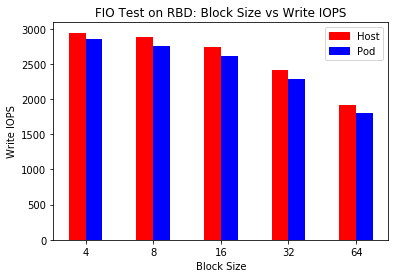

In [101]:
# RBD BLOCK SIZE READ
x_labels = sorted(host_gluster_bs_read_dict.keys())

xlabel = "Block Size"
y_host = take_median(host_rbd_bs_read_iops)
y_pod = take_median(pod_rbd_bs_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on RBD: Block Size vs Read IOPS"


# host
host_rbd_bs_read_medians = copy.deepcopy(y_host)
host_rbd_bs_read_means = take_mean(host_rbd_bs_read_iops)
host_rbd_bs_read_stds = take_std(host_rbd_bs_read_iops)
# pod
pod_rbd_bs_read_medians = copy.deepcopy(y_pod)
pod_rbd_bs_read_means = take_mean(pod_rbd_bs_read_iops)
pod_rbd_bs_read_stds = take_std(pod_rbd_bs_read_iops)

print "Host RBD read bs medians: ", y_host
print "Host RBD read bs means: ", host_rbd_bs_read_means
print "Host RBD read bs stds: ", host_rbd_bs_read_stds

print "Pod RBD read bs medians: ", y_pod
print "Pod RBD read bs means: ", pod_rbd_bs_read_means
print "Pod RBD read bs stds: ", pod_rbd_bs_read_stds
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "rbd_bs_read" )



# RBD BLOCK SIZE WRITE
x_labels = sorted(host_gluster_bs_read_dict.keys())

xlabel = "Block Size"
y_host = take_median(host_rbd_bs_write_iops)
y_pod = take_median(pod_rbd_bs_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on RBD: Block Size vs Write IOPS"


# host
host_rbd_bs_write_medians = copy.deepcopy(y_host)
host_rbd_bs_write_means = take_mean(host_rbd_bs_write_iops)
host_rbd_bs_write_stds = take_std(host_rbd_bs_write_iops)
# pod
pod_rbd_bs_write_medians = copy.deepcopy(y_pod)
pod_rbd_bs_write_means = take_mean(pod_rbd_bs_write_iops)
pod_rbd_bs_write_stds = take_std(pod_rbd_bs_write_iops)

print "Host RBD write bs medians: ", y_host
print "Host RBD write bs means: ", host_rbd_bs_write_means
print "Host RBD write bs stds: ", host_rbd_bs_write_stds

print "Pod RBD write bs medians: ", y_pod
print "Pod RBD write bs means: ", pod_rbd_bs_write_means
print "Pod RBD write bs stds: ", pod_rbd_bs_write_stds
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "rbd_bs_write" )



Host gluster read bs medians:  [ 2222.   2263.5  2308.   2275.   2271.   2268. ]
Host gluster read bs means:  [2155.872549019608, 2222.9411764705883, 2287.6666666666665, 2248.3861386138615, 2248.6732673267325, 2251.6831683168316]
Host gluster read bs stds:  [2155.872549019608, 2222.9411764705883, 2287.6666666666665, 2248.3861386138615, 2248.6732673267325, 2251.6831683168316]
Pod gluster read bs medians:  [ 2097.  2135.  2075.  2049.  2071.  2091.]
Pod gluster read bs means:  [2106.9405940594061, 2114.7623762376238, 2071.2178217821784, 2037.2871287128712, 2073.8514851485147, 2085.2772277227723]
Pod gluster read bs stds:  [109.99251295691806, 119.10326233694856, 148.37673511695908, 79.765663800025393, 119.1521521798136, 52.605221066008141]


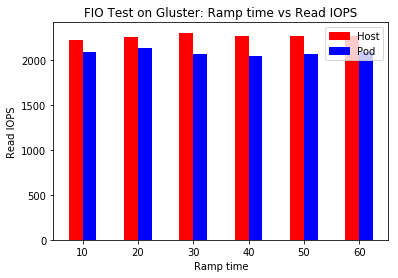

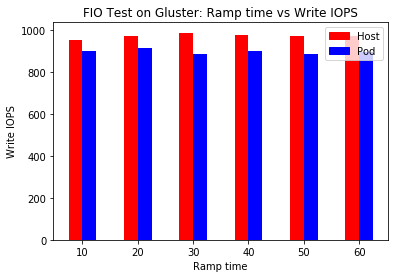

Host gluster write rt medians:  [ 951.   972.   987.5  976.   974.   973. ]
Host gluster write rt means:  [923.0, 954.32352941176475, 979.21568627450984, 972.3564356435644, 964.05940594059405, 965.39603960396039]
Host gluster write rt stds:  [95.486884429429438, 44.855576907449482, 47.418377229074714, 40.724037263730857, 77.918950246829468, 73.508008482395553]
Pod gluster write rt medians:  [ 898.  916.  886.  899.  888.  897.]
Pod gluster write rt means:  [902.16831683168311, 907.39603960396039, 886.16831683168311, 904.17821782178214, 889.06930693069307, 894.03960396039599]
Pod gluster write rt stds:  [46.802527922530231, 51.503932217066826, 64.450774723919963, 41.270274594926946, 51.163542369899361, 22.53882054425921]


In [178]:
# GLUSTER RAMPTIME READ
x_labels = sorted(host_gluster_rt_read_dict.keys())

xlabel = "Ramp time"
y_host = take_median(host_gluster_rt_read_iops)
y_pod = take_median(pod_gluster_rt_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on Gluster: Ramp time vs Read IOPS"


# host
host_gluster_rt_read_medians = copy.deepcopy(y_host)
host_gluster_rt_read_means = take_mean(host_gluster_rt_read_iops)
host_gluster_rt_read_stds = take_std(host_gluster_rt_read_iops)
# pod
pod_gluster_rt_read_medians = copy.deepcopy(y_pod)
pod_gluster_rt_read_means = take_mean(pod_gluster_rt_read_iops)
pod_gluster_rt_read_stds = take_std(pod_gluster_rt_read_iops)

print "Host gluster read bs medians: ", y_host
print "Host gluster read bs means: ", host_gluster_rt_read_means
print "Host gluster read bs stds: ", host_gluster_rt_read_means

print "Pod gluster read bs medians: ", y_pod
print "Pod gluster read bs means: ", pod_gluster_rt_read_means
print "Pod gluster read bs stds: ", pod_gluster_rt_read_stds

plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "gluster_rt_read" )



# GLUSTER RAMPTIME WRITE
x_labels = sorted(host_gluster_rt_read_dict.keys())

xlabel = "Ramp time"
y_host = take_median(host_gluster_rt_write_iops)
y_pod = take_median(pod_gluster_rt_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on Gluster: Ramp time vs Write IOPS"


plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "gluster_rt_write" )


# host
host_gluster_rt_write_medians = copy.deepcopy(y_host)
host_gluster_rt_write_means = take_mean(host_gluster_rt_write_iops)
host_gluster_rt_write_stds = take_std(host_gluster_rt_write_iops)
# pod
pod_gluster_rt_write_medians = copy.deepcopy(y_pod)
pod_gluster_rt_write_means = take_mean(pod_gluster_rt_write_iops)
pod_gluster_rt_write_stds = take_std(pod_gluster_rt_write_iops)

print "Host gluster write rt medians: ", y_host
print "Host gluster write rt means: ", host_gluster_rt_write_means
print "Host gluster write rt stds: ", host_gluster_rt_write_stds

print "Pod gluster write rt medians: ", y_pod
print "Pod gluster write rt means: ", pod_gluster_rt_write_means
print "Pod gluster write rt stds: ", pod_gluster_rt_write_stds

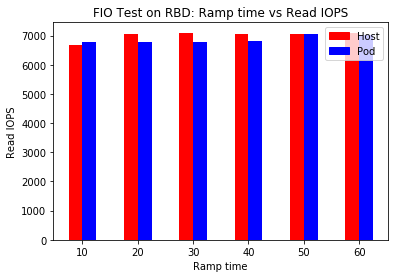

Host RBD read rt medians:  [ 6664.  7053.  7100.  7063.  7057.  7075.]
Host RBD read rt means:  [6668.9306930693074, 7058.4158415841584, 7080.287128712871, 7054.4554455445541, 7044.742574257426, 7056.4059405940598]
Host RBD read rt stds:  [200.73051031372083, 92.736960848736317, 97.09109090611696, 81.152042213948988, 107.76989177674447, 96.671248371680008]
Pod RBD read rt medians:  [ 6775.5  6781.   6767.   6833.   7059.   7035. ]
Pod RBD read rt means:  [6770.5699999999997, 6772.8118811881186, 6762.1089108910892, 6848.8514851485152, 7053.0900000000001, 7030.0200000000004]
Pod RBD read rt stds:  [239.45576856697355, 124.29513845278015, 127.21836695577038, 133.08631801334346, 101.85755691160082, 94.626632614713714]


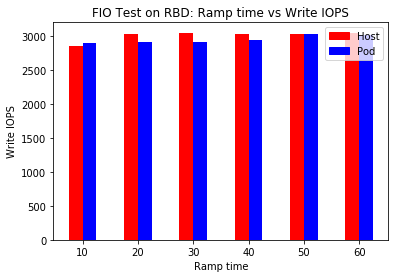

Host RBD write rt medians:  [ 2852.  3024.  3044.  3029.  3026.  3034.]
Host RBD write rt means:  [2857.9306930693069, 3026.7227722772277, 3036.128712871287, 3025.128712871287, 3020.9207920792078, 3025.90099009901]
Host RBD write rt stds:  [85.102647097984061, 39.730059152174327, 41.641958886770183, 34.806868380566954, 46.213384364511924, 41.470377105079784]
Pod RBD write rt medians:  [ 2899.5  2908.   2902.   2930.   3027.5  3017. ]
Pod RBD write rt means:  [2900.2399999999998, 2904.2772277227723, 2899.6930693069307, 2936.90099009901, 3024.5300000000002, 3014.5900000000001]
Pod RBD write rt stds:  [100.48005971335807, 53.322690136597458, 54.541607802378394, 57.049831431358641, 43.665422246899205, 40.574646024333965]


In [179]:
# RBD RAMPTIME READ
x_labels = sorted(host_rbd_rt_read_dict.keys())

xlabel = "Ramp time"
y_host = take_median(host_rbd_rt_read_iops)
y_pod = take_median(pod_rbd_rt_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on RBD: Ramp time vs Read IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "rbd_rt_read" )
# host
host_rbd_rt_read_medians = take_median(host_rbd_rt_read_iops)
host_rbd_rt_read_means = take_mean(host_rbd_rt_read_iops)
host_rbd_rt_read_stds = take_std(host_rbd_rt_read_iops)
# pod
pod_rbd_rt_read_medians = take_median(pod_rbd_rt_read_iops)
pod_rbd_rt_read_means = take_mean(pod_rbd_rt_read_iops)
pod_rbd_rt_read_stds = take_std(pod_rbd_rt_read_iops)

print "Host RBD read rt medians: ", y_host
print "Host RBD read rt means: ", host_rbd_rt_read_means
print "Host RBD read rt stds: ", host_rbd_rt_read_stds

print "Pod RBD read rt medians: ", y_pod
print "Pod RBD read rt means: ", pod_rbd_rt_read_means
print "Pod RBD read rt stds: ", pod_rbd_rt_read_stds


# RBD RAMPTIME WRITE
x_labels = sorted(host_rbd_rt_read_dict.keys())

xlabel = "Ramp time"
y_host = take_median(host_rbd_rt_write_iops)
y_pod = take_median(pod_rbd_rt_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on RBD: Ramp time vs Write IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "rbd_rt_write" )

# host
host_rbd_rt_write_medians = take_median(host_rbd_rt_write_iops)
host_rbd_rt_write_means = take_mean(host_rbd_rt_write_iops)
host_rbd_rt_write_stds = take_std(host_rbd_rt_write_iops)
# pod
pod_rbd_rt_write_medians = take_median(pod_rbd_rt_write_iops)
pod_rbd_rt_write_means = take_mean(pod_rbd_rt_write_iops)
pod_rbd_rt_write_stds = take_std(pod_rbd_rt_write_iops)

print "Host RBD write rt medians: ", y_host
print "Host RBD write rt means: ", host_rbd_rt_write_means
print "Host RBD write rt stds: ", host_rbd_rt_write_stds

print "Pod RBD write rt medians: ", y_pod
print "Pod RBD write rt means: ", pod_rbd_rt_write_means
print "Pod RBD write rt stds: ", pod_rbd_rt_write_stds

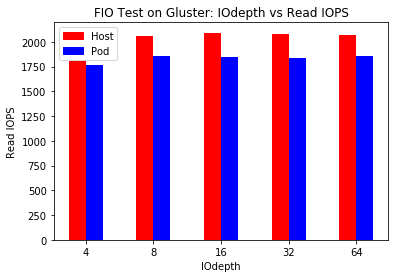

Host gluster read depth medians:  [ 1811.  2059.  2092.  2078.  2069.]
Host gluster read depth means:  [1845.920792079208, 2044.8712871287128, 2099.6930693069307, 2067.5049504950493, 2063.2178217821784]
Host gluster read depth stds:  [145.74368407885657, 208.19372468293369, 65.255285825771367, 145.55735311140938, 149.63299021803982]
Pod gluster read depth medians:  [ 1762.  1852.  1850.  1840.  1853.]
Pod gluster read depth means:  [1826.7920792079208, 1970.3366336633662, 2036.2079207920792, 2100.7128712871286, 2130.8118811881186]
Pod gluster read depth stds:  [668.50550501420014, 1215.6318022974656, 2077.1491759965629, 2668.4220365380465, 2896.6515927463256]


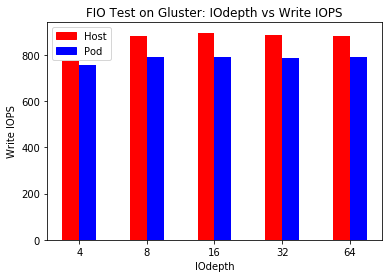

Host gluster write depth medians:  [ 775.  883.  897.  888.  883.]
Host gluster write depth means:  [790.20792079207922, 874.73267326732673, 898.85148514851483, 884.78217821782175, 882.52475247524751]
Host gluster write depth stds:  [62.242629184154019, 89.607161476654014, 29.035446462206853, 62.904863568740858, 64.882924886062398]
Pod gluster write depth medians:  [ 755.  793.  792.  788.  793.]
Pod gluster write depth means:  [782.60396039603961, 843.31683168316829, 871.73267326732673, 899.24752475247521, 912.18811881188117]
Pod gluster write depth stds:  [286.79267977484028, 521.45253964558765, 890.94320796757131, 1144.5294714461156, 1242.3893118644714]


In [83]:
# GLUSTER IODEPTH READ
x_labels = sorted(host_gluster_depth_read_dict.keys())

xlabel = "IOdepth"
y_host = take_median(host_gluster_depth_read_iops)
y_pod = take_median(pod_gluster_depth_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on Gluster: IOdepth vs Read IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "gluster_iodepth_read" )
# host
host_gluster_depth_read_medians = y_host
host_gluster_depth_read_means = take_mean(host_gluster_depth_read_iops)
host_gluster_depth_read_stds = take_std(host_gluster_depth_read_iops)
# pod
pod_gluster_depth_read_medians = y_pod
pod_gluster_depth_read_means = take_mean(pod_gluster_depth_read_iops)
pod_gluster_depth_read_stds = take_std(pod_gluster_depth_read_iops)

print "Host gluster read depth medians: ", y_host
print "Host gluster read depth means: ", host_gluster_depth_read_means
print "Host gluster read depth stds: ", host_gluster_depth_read_stds

print "Pod gluster read depth medians: ", y_pod
print "Pod gluster read depth means: ", pod_gluster_depth_read_means
print "Pod gluster read depth stds: ", pod_gluster_depth_read_stds



# GLUSTER IODEPTH WRITE
x_labels = sorted(host_gluster_depth_read_dict.keys())

xlabel = "IOdepth"
y_host = take_median(host_gluster_depth_write_iops)
y_pod = take_median(pod_gluster_depth_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on Gluster: IOdepth vs Write IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "gluster_iodepth_write" )

# host
host_gluster_depth_write_medians = copy.deepcopy(y_host)
host_gluster_depth_write_means = take_mean(host_gluster_depth_write_iops)
host_gluster_depth_write_stds = take_std(host_gluster_depth_write_iops)
# pod
pod_gluster_depth_write_medians = copy.deepcopy(y_pod)
pod_gluster_depth_write_means = take_mean(pod_gluster_depth_write_iops)
pod_gluster_depth_write_stds = take_std(pod_gluster_depth_write_iops)

print "Host gluster write depth medians: ", y_host
print "Host gluster write depth means: ", host_gluster_depth_write_means
print "Host gluster write depth stds: ", host_gluster_depth_write_stds

print "Pod gluster write depth medians: ", y_pod
print "Pod gluster write depth means: ", pod_gluster_depth_write_means
print "Pod gluster write depth stds: ", pod_gluster_depth_write_stds

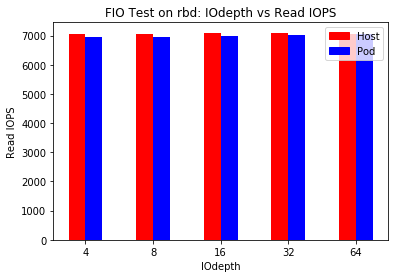

Host rbd read depth medians:  [ 7041.   7035.5  7094.   7096.5  7066. ]
Host rbd read depth means:  [7013.1499999999996, 7030.6199999999999, 7090.21, 7093.71, 7060.7700000000004]
Host rbd read depth stds:  [165.03510990089353, 121.45705249181704, 83.340061795033478, 81.108482293777371, 88.915336697332492]
Pod rbd read depth medians:  [ 6958.  6965.  6988.  7017.  7052.]
Pod rbd read depth means:  [6965.257425742574, 6922.9306930693074, 6965.8415841584156, 6972.3960396039602, 6999.5742574257429]
Pod rbd read depth stds:  [172.94082164542007, 217.13956170158238, 157.55406004008341, 181.38641424165144, 170.79478430918451]


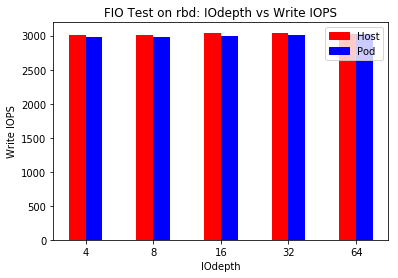

Host rbd write depth medians:  [ 3011.5  3014.5  3042.   3043.   3030.5]
Host rbd write depth means:  [2998.8600000000001, 3012.0799999999999, 3040.4099999999999, 3041.9099999999999, 3027.7800000000002]
Host rbd write depth stds:  [70.534249836515599, 51.802061735031359, 35.736842333927598, 34.749415822427864, 38.167415422058646]
Pod rbd write depth medians:  [ 2976.  2981.  2997.  3009.  3024.]
Pod rbd write depth means:  [2977.9504950495048, 2965.3366336633662, 2987.0891089108909, 2989.871287128713, 3001.5346534653463]
Pod rbd write depth stds:  [74.160299517379244, 94.216232990736827, 67.591097165511698, 77.820263003840225, 73.268469351539878]


In [58]:
# rbd IODEPTH READ
x_labels = sorted(host_rbd_depth_read_dict.keys())

xlabel = "IOdepth"
y_host = take_median(host_rbd_depth_read_iops)
y_pod = take_median(pod_rbd_depth_read_iops)
ylabel= "Read IOPS"
title = "FIO Test on rbd: IOdepth vs Read IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "rbd_iodepth_read" )

# host
host_rbd_depth_read_medians = copy.deepcopy(y_host)
host_rbd_depth_read_means = take_mean(host_rbd_depth_read_iops)
host_rbd_depth_read_stds = take_std(host_rbd_depth_read_iops)
# pod
pod_rbd_depth_read_medians = copy.deepcopy(y_pod)
pod_rbd_depth_read_means = take_mean(pod_rbd_depth_read_iops)
pod_rbd_depth_read_stds = take_std(pod_rbd_depth_read_iops)

print "Host rbd read depth medians: ", host_rbd_depth_read_medians
print "Host rbd read depth means: ", host_rbd_depth_read_means
print "Host rbd read depth stds: ", host_rbd_depth_read_stds

print "Pod rbd read depth medians: ", pod_rbd_depth_read_medians
print "Pod rbd read depth means: ", pod_rbd_depth_read_means
print "Pod rbd read depth stds: ", pod_rbd_depth_read_stds


# rbd IODEPTH WRITE
x_labels = sorted(host_rbd_depth_read_dict.keys())

xlabel = "IOdepth"
y_host = take_median(host_rbd_depth_write_iops)
y_pod = take_median(pod_rbd_depth_write_iops)
ylabel= "Write IOPS"
title = "FIO Test on rbd: IOdepth vs Write IOPS"
plot_values(x_labels, xlabel, y_host, y_pod, ylabel, title, "rbd_iodepth_write" )

# host
host_rbd_depth_write_medians = copy.deepcopy(y_host)
host_rbd_depth_write_means = take_mean(host_rbd_depth_write_iops)
host_rbd_depth_write_stds = take_std(host_rbd_depth_write_iops)
# pod
pod_rbd_depth_write_medians = copy.deepcopy(y_pod)
pod_rbd_depth_write_means = take_mean(pod_rbd_depth_write_iops)
pod_rbd_depth_write_stds = take_std(pod_rbd_depth_write_iops)

print "Host rbd write depth medians: ", y_host
print "Host rbd write depth means: ", host_rbd_depth_write_means
print "Host rbd write depth stds: ", host_rbd_depth_write_stds

print "Pod rbd write depth medians: ", y_pod
print "Pod rbd write depth means: ", pod_rbd_depth_write_means
print "Pod rbd write depth stds: ", pod_rbd_depth_write_stds

In [22]:
import pandas as pd
import copy

In [140]:
def get_matrix(labels,medians,means,stds):
    d=3
    matrix = np.array((labels,
                       np.floor(medians),
                       np.ceil(means),
                       np.round(stds,decimals=d)
                     )).transpose()
    return matrix

def get_table1(matrix):
    return pd.DataFrame(matrix, columns=['','Mediana','Media','Desviacion Estandar']).to_latex(index=False)

def print_table1(table1):
    print "\\begin{table}[h]"
    print table1
    print "\\end{table}"


In [141]:
# GLUSTER BS
print ""

labels = [4, 8, 16, 32, 64 ]

print "gluster bs READ"
host_gluster_bs_read_matrix = get_matrix(labels, 
                                        host_gluster_bs_read_medians,
                                       host_gluster_bs_read_means,
                                       host_gluster_bs_read_stds)
pod_gluster_bs_read_matrix = get_matrix(labels,
                                       pod_gluster_bs_read_medians,
                                      pod_gluster_bs_read_means,
                                      pod_gluster_bs_read_stds)


print "\\begin{itemize}"
print "\\item HOST READ"
print get_table1(host_gluster_bs_read_matrix)
print "\\item POD READ"
print get_table1(pod_gluster_bs_read_matrix)


# gluster bs WRITE
host_gluster_bs_write_matrix = get_matrix(labels, 
                                        host_gluster_bs_write_medians,
                                       host_gluster_bs_write_means,
                                       host_gluster_bs_write_stds)
pod_gluster_bs_write_matrix = get_matrix(labels,
                                       pod_gluster_bs_write_medians,
                                      pod_gluster_bs_write_means,
                                      pod_gluster_bs_write_stds)


print "\\item HOST WRITE"
print get_table1(host_gluster_bs_write_matrix)
print "\\item POD WRITE"
print get_table1(pod_gluster_bs_write_matrix)
print "\\end{itemize}"


print_table1(get_table1(pod_gluster_bs_write_matrix))


gluster bs READ
\begin{itemize}
\item HOST READ
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion Estandar \\
\midrule
  4.0 &   2285.0 &  2257.0 &              176.267 \\
  8.0 &   2217.0 &  2207.0 &               64.517 \\
 16.0 &   2108.0 &  2103.0 &               47.430 \\
 32.0 &   1958.0 &  1959.0 &               36.521 \\
 64.0 &   1652.0 &  1647.0 &               43.156 \\
\bottomrule
\end{tabular}

\item POD READ
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion Estandar \\
\midrule
  4.0 &   2009.0 &  1999.0 &               57.557 \\
  8.0 &   1905.0 &  1917.0 &               51.123 \\
 16.0 &   1715.0 &  1693.0 &              147.493 \\
 32.0 &   1419.0 &  1473.0 &              123.934 \\
 64.0 &    936.0 &  1116.0 &              211.561 \\
\bottomrule
\end{tabular}

\item HOST WRITE
\begin{tabular}{rrrr}
\toprule
      &  Mediana &  Media &  Desviacion Estandar \\
\midrule
  4.0 &    977.0 &  967.0 &               75.643 \\
  8.0

In [102]:
# RBD BS
print ""

labels = [4, 8, 16, 32, 64 ]

print "rbd bs READ"
host_rbd_bs_read_matrix = get_matrix(labels, 
                                        host_rbd_bs_read_medians,
                                       host_rbd_bs_read_means,
                                       host_rbd_bs_read_stds)
pod_rbd_bs_read_matrix = get_matrix(labels,
                                       pod_rbd_bs_read_medians,
                                      pod_rbd_bs_read_means,
                                      pod_rbd_bs_read_stds)


print "################ HOST ######################"
print get_table1(host_rbd_bs_read_matrix)
print "################ POD ######################"
print get_table1(pod_rbd_bs_read_matrix)


# rbd bs WRITE
host_rbd_bs_write_matrix = get_matrix(labels, 
                                        host_rbd_bs_write_medians,
                                       host_rbd_bs_write_means,
                                       host_rbd_bs_write_stds)
pod_rbd_bs_write_matrix = get_matrix(labels,
                                       pod_rbd_bs_write_medians,
                                      pod_rbd_bs_write_means,
                                      pod_rbd_bs_write_stds)

print "rbd bs WRITE"
print "############### HOST #######################"
print get_table1(host_rbd_bs_write_matrix)
print "################ POD ######################"
print get_table1(pod_rbd_bs_write_matrix)



rbd bs READ
################ HOST ######################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
  4.0 &   6863.0 &  6884.0 &                147.620 \\
  8.0 &   6724.0 &  6695.0 &                190.660 \\
 16.0 &   6335.0 &  6319.0 &                192.464 \\
 32.0 &   5653.0 &  5643.0 &                214.968 \\
 64.0 &   4419.0 &  4414.0 &                282.846 \\
\bottomrule
\end{tabular}

################ POD ######################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
  4.0 &   6654.0 &  6666.0 &                107.435 \\
  8.0 &   6424.0 &  6427.0 &                112.967 \\
 16.0 &   6058.0 &  6050.0 &                188.356 \\
 32.0 &   5356.0 &  5334.0 &                224.723 \\
 64.0 &   4165.0 &  4170.0 &                262.126 \\
\bottomrule
\end{tabular}

rbd bs WRITE
############### HOST #######################
\begin{tabular}{rrrr

In [92]:
# GLUSTER RT

labels = [10, 20, 30, 40, 50, 60]

print "gluster rt READ"
host_gluster_rt_read_matrix = get_matrix(labels, 
                                        host_gluster_rt_read_medians,
                                       host_gluster_rt_read_means,
                                       host_gluster_rt_read_stds)
pod_gluster_rt_read_matrix = get_matrix(labels,
                                       pod_gluster_rt_read_medians,
                                      pod_gluster_rt_read_means,
                                      pod_gluster_rt_read_stds)


print "################ HOST ######################"
print get_table1(host_gluster_rt_read_matrix)
print "################ POD ######################"
print get_table1(pod_gluster_rt_read_matrix)


# gluster rt WRITE
host_gluster_rt_write_matrix = get_matrix(labels, 
                                        host_gluster_rt_write_medians,
                                       host_gluster_rt_write_means,
                                       host_gluster_rt_write_stds)
pod_gluster_rt_write_matrix = get_matrix(labels,
                                       pod_gluster_rt_write_medians,
                                      pod_gluster_rt_write_means,
                                      pod_gluster_rt_write_stds)

print "gluster rt WRITE"
print "############### HOST #######################"
print get_table1(host_gluster_rt_write_matrix)
print "################ POD ######################"
print get_table1(pod_gluster_rt_write_matrix)

gluster rt READ
################ HOST ######################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
 10.0 &   2222.0 &  2156.0 &                223.547 \\
 20.0 &   2263.0 &  2223.0 &                103.811 \\
 30.0 &   2308.0 &  2288.0 &                111.268 \\
 40.0 &   2275.0 &  2249.0 &                139.216 \\
 50.0 &   2271.0 &  2249.0 &                181.954 \\
 60.0 &   2268.0 &  2252.0 &                171.671 \\
\bottomrule
\end{tabular}

################ POD ######################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
 10.0 &   2097.0 &  2107.0 &                109.993 \\
 20.0 &   2135.0 &  2115.0 &                119.103 \\
 30.0 &   2075.0 &  2072.0 &                148.377 \\
 40.0 &   2049.0 &  2038.0 &                 79.766 \\
 50.0 &   2071.0 &  2074.0 &                119.152 \\
 60.0 &   2091.0 &  2086.0 &                 52

In [180]:
# RBD RT
print ""

labels = [10, 20, 30, 40, 50, 60]

print "rbd rt READ"
host_rbd_rt_read_matrix = get_matrix(labels, 
                                        host_rbd_rt_read_medians,
                                       host_rbd_rt_read_means,
                                       host_rbd_rt_read_stds)
pod_rbd_rt_read_matrix = get_matrix(labels,
                                       pod_rbd_rt_read_medians,
                                      pod_rbd_rt_read_means,
                                      pod_rbd_rt_read_stds)


print "################ HOST ######################"
print get_table1(host_rbd_rt_read_matrix)
print "################ POD ######################"
print get_table1(pod_rbd_rt_read_matrix)


# rbd rt WRITE
host_rbd_rt_write_matrix = get_matrix(labels, 
                                        host_rbd_rt_write_medians,
                                       host_rbd_rt_write_means,
                                       host_rbd_rt_write_stds)
pod_rbd_rt_write_matrix = get_matrix(labels,
                                       pod_rbd_rt_write_medians,
                                      pod_rbd_rt_write_means,
                                      pod_rbd_rt_write_stds)

print "rbd rt WRITE"
print "############### HOST #######################"
print get_table1(host_rbd_rt_write_matrix)
print "################ POD ######################"
print get_table1(pod_rbd_rt_write_matrix)



rbd rt READ
################ HOST ######################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion Estandar \\
\midrule
 10.0 &   6664.0 &  6669.0 &              200.731 \\
 20.0 &   7053.0 &  7059.0 &               92.737 \\
 30.0 &   7100.0 &  7081.0 &               97.091 \\
 40.0 &   7063.0 &  7055.0 &               81.152 \\
 50.0 &   7057.0 &  7045.0 &              107.770 \\
 60.0 &   7075.0 &  7057.0 &               96.671 \\
\bottomrule
\end{tabular}

################ POD ######################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion Estandar \\
\midrule
 10.0 &   6775.0 &  6771.0 &              239.456 \\
 20.0 &   6781.0 &  6773.0 &              124.295 \\
 30.0 &   6767.0 &  6763.0 &              127.218 \\
 40.0 &   6833.0 &  6849.0 &              133.086 \\
 50.0 &   7059.0 &  7054.0 &              101.858 \\
 60.0 &   7035.0 &  7031.0 &               94.627 \\
\bottomrule
\end{tabular}

rbd rt WRITE
#########

In [84]:
# GLUSTER IODEPTH

print ""


labels = [4, 8, 16, 32, 64]

print "gluster IODEPTH READ"
host_gluster_depth_read_matrix = get_matrix(labels, 
                                        host_gluster_depth_read_medians,
                                       host_gluster_depth_read_means,
                                       host_gluster_depth_read_stds)
pod_gluster_depth_read_matrix = get_matrix(labels,
                                       pod_gluster_depth_read_medians,
                                      pod_gluster_depth_read_means,
                                      pod_gluster_depth_read_stds)


print "######################################"
print get_table1(host_gluster_depth_read_matrix)
print "######################################"
print get_table1(pod_gluster_depth_read_matrix)


# gluster IODEPTH WRITE
host_gluster_depth_write_matrix = get_matrix(labels, 
                                        host_gluster_depth_write_medians,
                                       host_gluster_depth_write_means,
                                       host_gluster_depth_write_stds)
pod_gluster_depth_write_matrix = get_matrix(labels,
                                       pod_gluster_depth_write_medians,
                                      pod_gluster_depth_write_means,
                                      pod_gluster_depth_write_stds)

print "gluster IODEPTH WRITE"
print "######################################"
print get_table1(host_gluster_depth_write_matrix)
print "######################################"
print get_table1(pod_gluster_depth_write_matrix)



gluster IODEPTH READ
######################################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
  4.0 &   1811.0 &  1846.0 &                145.744 \\
  8.0 &   2059.0 &  2045.0 &                208.194 \\
 16.0 &   2092.0 &  2100.0 &                 65.255 \\
 32.0 &   2078.0 &  2068.0 &                145.557 \\
 64.0 &   2069.0 &  2064.0 &                149.633 \\
\bottomrule
\end{tabular}

######################################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
  4.0 &   1762.0 &  1827.0 &                668.506 \\
  8.0 &   1852.0 &  1971.0 &               1215.632 \\
 16.0 &   1850.0 &  2037.0 &               2077.149 \\
 32.0 &   1840.0 &  2101.0 &               2668.422 \\
 64.0 &   1853.0 &  2131.0 &               2896.652 \\
\bottomrule
\end{tabular}

gluster IODEPTH WRITE
######################################
\begin{tabular}{rrr

In [81]:
#### Pandas tables of results

#RBD IODEPTH READ
print "Host rbd read depth medians: ", host_rbd_depth_read_medians
print "Host rbd read depth means: ", host_rbd_depth_read_means
print "Host rbd read depth stds: ", host_rbd_depth_read_stds

print "Pod rbd read depth medians: ", pod_rbd_depth_read_medians
print "Pod rbd read depth means: ", pod_rbd_depth_read_means
print "Pod rbd read depth stds: ", pod_rbd_depth_read_stds



print ""


labels = [4, 8, 16, 32, 64]

print "RBD IODEPTH READ"
host_rbd_depth_read_matrix = get_matrix(labels, 
                                        host_rbd_depth_read_medians,
                                       host_rbd_depth_read_means,
                                       host_rbd_depth_read_stds)
pod_rbd_depth_read_matrix = get_matrix(labels,
                                       pod_rbd_depth_read_medians,
                                      pod_rbd_depth_read_means,
                                      pod_rbd_depth_read_stds)


print "######################################"
print get_table1(host_rbd_depth_read_matrix)
print "######################################"
print get_table1(pod_rbd_depth_read_matrix)


# RBD IODEPTH WRITE
host_rbd_depth_write_matrix = get_matrix(labels, 
                                        host_rbd_depth_write_medians,
                                       host_rbd_depth_write_means,
                                       host_rbd_depth_write_stds)
pod_rbd_depth_write_matrix = get_matrix(labels,
                                       pod_rbd_depth_write_medians,
                                      pod_rbd_depth_write_means,
                                      pod_rbd_depth_write_stds)

print "RBD IODEPTH WRITE"
print "######################################"
print get_table1(host_rbd_depth_write_matrix)
print "######################################"
print get_table1(pod_rbd_depth_write_matrix)







Host rbd read depth medians:  [ 7041.   7035.5  7094.   7096.5  7066. ]
Host rbd read depth means:  [7013.1499999999996, 7030.6199999999999, 7090.21, 7093.71, 7060.7700000000004]
Host rbd read depth stds:  [165.03510990089353, 121.45705249181704, 83.340061795033478, 81.108482293777371, 88.915336697332492]
Pod rbd read depth medians:  [ 6958.  6965.  6988.  7017.  7052.]
Pod rbd read depth means:  [6965.257425742574, 6922.9306930693074, 6965.8415841584156, 6972.3960396039602, 6999.5742574257429]
Pod rbd read depth stds:  [172.94082164542007, 217.13956170158238, 157.55406004008341, 181.38641424165144, 170.79478430918451]

RBD IODEPTH READ
######################################
\begin{tabular}{rrrr}
\toprule
      &  Mediana &   Media &  Desviacion \textbackslash Estandar \\
\midrule
  4.0 &   7041.0 &  7014.0 &                165.035 \\
  8.0 &   7035.0 &  7031.0 &                121.457 \\
 16.0 &   7094.0 &  7091.0 &                 83.340 \\
 32.0 &   7096.0 &  7094.0 &               

In [104]:
############### TABLAS IOPS #####################################

In [29]:

testo_1 = copy.deepcopy(np.floor(host_rbd_depth_write_medians))
testo_2 = copy.deepcopy(np.ceil(host_rbd_depth_write_means))
testo_3 = copy.deepcopy(host_rbd_depth_write_stds)
print np.array((testo_1,testo_2,testo_3)).transpose()
testo = pd.DataFrame(np.array((testo_1,testo_2,testo_3)).transpose())
print testo.to_latex()

[[ 3011.          2999.            70.53424984]
 [ 3014.          3013.            51.80206174]
 [ 3042.          3041.            35.73684233]
 [ 3043.          3042.            34.74941582]
 [ 3030.          3028.            38.16741542]]
\begin{tabular}{lrrr}
\toprule
{} &       0 &       1 &          2 \\
\midrule
0 &  3011.0 &  2999.0 &  70.534250 \\
1 &  3014.0 &  3013.0 &  51.802062 \\
2 &  3042.0 &  3041.0 &  35.736842 \\
3 &  3043.0 &  3042.0 &  34.749416 \\
4 &  3030.0 &  3028.0 &  38.167415 \\
\bottomrule
\end{tabular}



In [36]:
ex= pd.DataFrame(host_rbd_depth_read_iops)
print ex.to_latex(index=False)

\begin{tabular}{rrrrr}
\toprule
   4  &    8  &    16 &    32 &    64 \\
\midrule
 6823 &  6963 &  7256 &  7099 &  7073 \\
 6839 &  6982 &  7093 &  7008 &  7139 \\
 6705 &  6939 &  7134 &  7029 &  6880 \\
 6698 &  6995 &  7070 &  7126 &  7010 \\
 7029 &  6995 &  7084 &  7016 &  7178 \\
 7283 &  7117 &  6976 &  6958 &  7020 \\
 7244 &  6857 &  7136 &  7075 &  7069 \\
 7102 &  7043 &  7086 &  7078 &  7247 \\
 7114 &  7093 &  7045 &  7093 &  7071 \\
 7214 &  7055 &  7101 &  7021 &  7083 \\
 6999 &  7076 &  7000 &  7156 &  7046 \\
 7134 &  7160 &  6893 &  7215 &  7089 \\
 6942 &  6931 &  7123 &  7113 &  7013 \\
 6987 &  7109 &  6969 &  7012 &  7046 \\
 6776 &  7106 &  7073 &  7022 &  7127 \\
 6895 &  6959 &  7119 &  7067 &  7172 \\
 6951 &  6965 &  6823 &  7106 &  7084 \\
 7147 &  7020 &  7032 &  7039 &  7093 \\
 7105 &  7058 &  7115 &  7204 &  7200 \\
 7203 &  7231 &  7077 &  7020 &  7050 \\
 7193 &  7111 &  7021 &  7127 &  7071 \\
 7013 &  7008 &  7072 &  7188 &  7004 \\
 7097 &  6950 & 

In [ ]:
### tablas host

In [224]:
df_host_gluster_bs_read = pd.DataFrame(host_gluster_bs_read_iops)
print df_host_gluster_bs_read.to_latex('tables/host_gluster_bs_read_longtable.txt',longtable=True, index=False)

df_host_gluster_bs_write = pd.DataFrame(host_gluster_bs_write_iops)
print df_host_gluster_bs_write.to_latex('tables/host_gluster_bs_write_longtable.txt',longtable=True, index=False)

None
None


In [150]:
# TABLAS 
df_host_rbd_bs_read = pd.DataFrame(host_rbd_bs_read_iops)
print df_host_rbd_bs_read.to_latex('tables/host_rbd_bs_read_longtable.txt',longtable=True,index=False)

df_host_rbd_bs_write = pd.DataFrame(host_rbd_bs_write_iops)
print df_host_rbd_bs_write.to_latex('tables/host_rbd_bs_write_longtable.txt',longtable=True,index=False)

None
None


In [194]:

# TABLAS gluster rt
df_host_gluster_rt_read = pd.DataFrame(host_gluster_rt_read_iops)
print df_host_gluster_rt_read.to_latex('tables/host_gluster_rt_read_longtable.txt',longtable=True,index=False)
print df_host_gluster_rt_read.to_latex(index=False)

df_host_gluster_rt_write = pd.DataFrame(host_gluster_rt_write_iops)
print df_host_gluster_rt_write.to_latex('tables/host_gluster_rt_write_longtable.txt',longtable=True,index=False)
print df_host_gluster_rt_write.to_latex(index=False)

None
\begin{tabular}{rrrrrr}
\toprule
   10 &    20 &    30 &    40 &    50 &    60 \\
\midrule
 2265 &  2052 &  2301 &  2245 &  2280 &  2305 \\
 2274 &  2208 &  2324 &  2259 &  2286 &  2309 \\
 2271 &  2176 &  2253 &  2114 &  2331 &  2307 \\
 2260 &  2142 &  2300 &  2246 &  1984 &  2292 \\
 2296 &  2245 &  2310 &  2260 &  2281 &  2266 \\
 1116 &  2295 &  2292 &  2275 &  2272 &  2263 \\
 2250 &  2107 &  2382 &  2288 &  2271 &  2253 \\
 2181 &  2283 &  2311 &  2258 &  2277 &  2265 \\
 1206 &  2321 &  2307 &  2288 &  2268 &  2282 \\
 2239 &  2297 &  2303 &  2280 &  2250 &  2265 \\
 2196 &  2339 &  2355 &  2293 &  2293 &  2275 \\
 2109 &  2216 &  2322 &  2276 &  2257 &  2249 \\
 2273 &  2056 &  2065 &  2312 &  2328 &  2255 \\
 2187 &  2107 &  2254 &  2270 &  2246 &  2247 \\
 2274 &  2131 &  2304 &  2338 &  2310 &  2298 \\
 2190 &  2078 &  2287 &  2253 &  2268 &  2235 \\
 2292 &  2108 &  2229 &  2305 &  2297 &  2267 \\
 1756 &  2312 &  2344 &  2276 &  2273 &  2253 \\
 2156 &  2338 &  2336 

In [225]:
# TABLAS RBD RT
df_host_rbd_rt_read = pd.DataFrame(host_rbd_rt_read_iops)
print df_host_rbd_rt_read.to_latex('tables/host_rbd_rt_read_longtable.txt',longtable=True, index=False)
print df_host_rbd_rt_read.to_latex(index=False)

df_host_rbd_rt_write = pd.DataFrame(host_rbd_rt_write_iops)
print df_host_rbd_rt_write.to_latex('tables/host_rbd_rt_write_longtable.txt',longtable=True, index=False)
print df_host_rbd_rt_write.to_latex(index=False)

None
\begin{tabular}{rrrrrr}
\toprule
   10 &    20 &    30 &    40 &    50 &    60 \\
\midrule
 6523 &  7028 &  7100 &  6962 &  7217 &  7108 \\
 6768 &  7043 &  7100 &  6961 &  7063 &  7061 \\
 6523 &  7114 &  7132 &  7083 &  7032 &  7067 \\
 6413 &  7088 &  7106 &  6993 &  7065 &  7091 \\
 6740 &  7052 &  7130 &  7005 &  6971 &  7075 \\
 6574 &  7179 &  7066 &  7118 &  7081 &  7084 \\
 6624 &  7165 &  7075 &  7053 &  7109 &  7127 \\
 6967 &  6984 &  7166 &  7102 &  7233 &  6986 \\
 6646 &  7069 &  7096 &  7162 &  7130 &  7095 \\
 6671 &  7188 &  7101 &  7089 &  6848 &  7134 \\
 6568 &  7082 &  7086 &  7152 &  7052 &  6931 \\
 6498 &  7093 &  6903 &  7121 &  6726 &  7102 \\
 6750 &  7022 &  7122 &  6962 &  6914 &  6967 \\
 6518 &  6984 &  7057 &  6931 &  7023 &  6890 \\
 6444 &  7217 &  7091 &  7086 &  7077 &  7090 \\
 6621 &  7035 &  6936 &  7023 &  7185 &  6962 \\
 6558 &  7140 &  7010 &  7009 &  7143 &  6976 \\
 6702 &  7176 &  7239 &  7111 &  7037 &  7085 \\
 6589 &  7005 &  7044 

In [145]:
# TABLAS gluster DEPTH
df_host_gluster_depth_read = pd.DataFrame(host_gluster_depth_read_iops)
print df_host_gluster_depth_read.to_latex('tables/host_gluster_depth_read_table.txt',index=False)
print df_host_gluster_depth_read.to_latex(index=False)

df_host_gluster_depth_read = pd.DataFrame(host_gluster_depth_read_iops)
print df_host_gluster_depth_read.to_latex('tables/host_gluster_depth_read_longtable.txt',longtable=True, index=False)
print df_host_gluster_depth_read.to_latex(index=False)

df_host_gluster_depth_write = pd.DataFrame(host_gluster_depth_write_iops)
print df_host_gluster_depth_write.to_latex('tables/host_gluster_depth_write_longtable.txt',longtable=True,index=False)
print df_host_gluster_depth_write.to_latex(index=False)

None
\begin{tabular}{rrrrr}
\toprule
   4  &    8  &    16 &    32 &    64 \\
\midrule
 1937 &  2136 &  2094 &  2052 &  2100 \\
 1998 &  2075 &  2043 &  2059 &  1992 \\
 1777 &  2102 &  2046 &  2115 &  2033 \\
 1779 &  2150 &  2024 &  2050 &  2038 \\
 1775 &  2157 &  2166 &  2104 &  2026 \\
 1737 &  2032 &  2002 &  2139 &  2166 \\
 2035 &  2073 &  2138 &  2105 &  2046 \\
 1776 &  2104 &  2153 &  2010 &  2078 \\
 1849 &  2036 &  2029 &  2045 &  2026 \\
 1988 &  2027 &  2181 &  2039 &  2156 \\
 1813 &  2006 &  2090 &  2042 &  2050 \\
 1763 &  2020 &  2103 &  2090 &  2040 \\
 1635 &  1980 &  2107 &  2102 &  2107 \\
 1203 &  2014 &  2129 &  2045 &  2162 \\
 1781 &  2006 &  2114 &  2045 &  2041 \\
 1526 &  2108 &  2098 &  2168 &  2073 \\
 1787 &  2090 &  1963 &  2096 &  2114 \\
 1794 &  2133 &  2082 &  2015 &  2123 \\
 1998 &  2008 &  2048 &  2078 &  2009 \\
 1946 &  1999 &  2045 &  2227 &  2066 \\
 1821 &  2021 &  2131 &   737 &  2005 \\
 1788 &  2037 &  2053 &  2027 &  2125 \\
 1980 &  20

In [148]:
# TABLAS RBD DEPTH
df_host_rbd_depth_read = pd.DataFrame(host_rbd_depth_read_iops)
print df_host_rbd_depth_read.to_latex('tables/host_rbd_depth_read_longtable.txt',longtable=True,index=False)
print df_host_rbd_depth_read.to_latex(index=False)

df_host_rbd_depth_write = pd.DataFrame(host_rbd_depth_write_iops)
print df_host_rbd_depth_write.to_latex('tables/host_rbd_depth_write_longtable.txt',longtable=True,index=False)
print df_host_rbd_depth_write.to_latex(index=False)


None
\begin{tabular}{rrrrr}
\toprule
   4  &    8  &    16 &    32 &    64 \\
\midrule
 6823 &  6963 &  7256 &  7099 &  7073 \\
 6839 &  6982 &  7093 &  7008 &  7139 \\
 6705 &  6939 &  7134 &  7029 &  6880 \\
 6698 &  6995 &  7070 &  7126 &  7010 \\
 7029 &  6995 &  7084 &  7016 &  7178 \\
 7283 &  7117 &  6976 &  6958 &  7020 \\
 7244 &  6857 &  7136 &  7075 &  7069 \\
 7102 &  7043 &  7086 &  7078 &  7247 \\
 7114 &  7093 &  7045 &  7093 &  7071 \\
 7214 &  7055 &  7101 &  7021 &  7083 \\
 6999 &  7076 &  7000 &  7156 &  7046 \\
 7134 &  7160 &  6893 &  7215 &  7089 \\
 6942 &  6931 &  7123 &  7113 &  7013 \\
 6987 &  7109 &  6969 &  7012 &  7046 \\
 6776 &  7106 &  7073 &  7022 &  7127 \\
 6895 &  6959 &  7119 &  7067 &  7172 \\
 6951 &  6965 &  6823 &  7106 &  7084 \\
 7147 &  7020 &  7032 &  7039 &  7093 \\
 7105 &  7058 &  7115 &  7204 &  7200 \\
 7203 &  7231 &  7077 &  7020 &  7050 \\
 7193 &  7111 &  7021 &  7127 &  7071 \\
 7013 &  7008 &  7072 &  7188 &  7004 \\
 7097 &  69

In [ ]:
#### tablas pod

In [223]:
# POD GLUSTER BS
df_pod_gluster_bs_read = pd.DataFrame(pod_gluster_bs_read_iops)
print df_pod_gluster_bs_read.to_latex('tables/pod_gluster_bs_read_longtable.txt',longtable=True, index=False)

df_pod_gluster_bs_write = pd.DataFrame(pod_gluster_bs_write_iops)
print df_pod_gluster_bs_write.to_latex('tables/pod_gluster_bs_write_longtable.txt',longtable=True, index=False)

None
None


In [198]:
# POD RBD BS
df_pod_rbd_bs_read = pd.DataFrame(pod_rbd_bs_read_iops)
print df_pod_rbd_bs_read.to_latex('tables/pod_rbd_bs_read_longtable.txt',longtable=True,index=False)

df_pod_rbd_bs_write = pd.DataFrame(pod_rbd_bs_write_iops)
print df_pod_rbd_bs_write.to_latex('tables/pod_rbd_bs_write_longtable.txt',longtable=True,index=False)

None
None


In [218]:
# POD GLUSTER RT
df_pod_gluster_rt_read = pd.DataFrame(pod_gluster_rt_read_iops)
print df_pod_gluster_rt_read.to_latex('tables/pod_gluster_rt_read_longtable.txt',longtable=True,index=False)
print df_pod_gluster_rt_read.to_latex(index=False)

df_pod_gluster_rt_write = pd.DataFrame(pod_gluster_rt_write_iops)
print df_pod_gluster_rt_write.to_latex('tables/pod_gluster_rt_write_longtable.txt',longtable=True,index=False)
print df_pod_gluster_rt_write.to_latex(index=False)

None
\begin{tabular}{rrrrrr}
\toprule
   10 &    20 &    30 &    40 &    50 &    60 \\
\midrule
 2162 &  2141 &  2156 &  2022 &  2158 &  2157 \\
 2020 &  1758 &  2063 &  2179 &  2009 &  2032 \\
 1999 &  2178 &  2078 &  1988 &  2135 &  2141 \\
 2072 &  1999 &  2165 &  2126 &  2114 &  2137 \\
 2118 &  2150 &  2180 &  2057 &  2130 &  2146 \\
 2051 &  2144 &  2043 &  2002 &  2048 &  2051 \\
 2036 &  2182 &  2081 &  2011 &  2032 &  2046 \\
 2238 &  2275 &  2135 &  2014 &  2035 &  2043 \\
 2072 &  2338 &  2041 &  2040 &  2158 &  2030 \\
 2128 &  2109 &  2102 &  2060 &  2039 &  2026 \\
 2140 &  2162 &  2131 &  1746 &  2132 &  2162 \\
 2145 &  2171 &  2168 &  2060 &  2133 &  2114 \\
 2054 &  2186 &  1997 &  1980 &  2146 &  2012 \\
 2067 &  2089 &  1971 &  2074 &  2055 &  2123 \\
 2052 &  2039 &  2175 &  2087 &  2113 &  2029 \\
 2130 &  1247 &  2018 &  2025 &  2022 &  2176 \\
 2113 &  2214 &  2157 &  1998 &  2039 &  2187 \\
 2097 &  2218 &  2129 &  1981 &  2126 &  2125 \\
 2111 &  2157 &   710 

In [217]:
# TABLAS RBD RT
df_pod_rbd_rt_read = pd.DataFrame(pod_rbd_rt_read_iops)
print df_pod_rbd_rt_read.to_latex('tables/pod_rbd_rt_read_longtable.txt',longtable=True, index=False)
print df_pod_rbd_rt_read.to_latex(index=False)

df_pod_rbd_rt_write = pd.DataFrame(pod_rbd_rt_write_iops)
print df_pod_rbd_rt_write.to_latex('tables/pod_rbd_rt_write_longtable.txt',longtable=True, index=False)
print df_pod_rbd_rt_write.to_latex(index=False)

None
\begin{tabular}{rrrrrr}
\toprule
   10 &    20 &    30 &    40 &    50 &    60 \\
\midrule
 6672 &  6788 &  6931 &  6910 &  7019 &  7060 \\
 6403 &  6717 &  6781 &  6913 &  6896 &  7073 \\
 6441 &  7130 &  6709 &  6833 &  7020 &  7068 \\
 6777 &  6800 &  6819 &  7010 &  7086 &  7213 \\
 6965 &  6689 &  6897 &  7073 &  6876 &  7143 \\
 6825 &  6710 &  6855 &  6792 &  7079 &  7053 \\
 6589 &  6974 &  6888 &  7103 &  7086 &  7092 \\
 6833 &  6751 &  6490 &  6759 &  7140 &  7017 \\
 6724 &  6921 &  6857 &  6798 &  7028 &  7048 \\
 7081 &  6812 &  6710 &  6640 &  7140 &  6979 \\
 6762 &  6663 &  6800 &  6798 &  7148 &  7122 \\
 6447 &  6747 &  6707 &  6776 &  6967 &  6917 \\
 6746 &  6885 &  6818 &  6799 &  6775 &  6893 \\
 6580 &  6795 &  6810 &  6749 &  7071 &  7105 \\
 6570 &  6821 &  6885 &  6808 &  7055 &  7091 \\
 6613 &  6971 &  6980 &  6920 &  6923 &  7147 \\
 6116 &  6887 &  6691 &  6908 &  7152 &  6820 \\
 7008 &  6742 &  6567 &  6788 &  7176 &  7100 \\
 6737 &  6826 &  6758 

In [215]:
# POD GLUSTER DEPTH
df_pod_gluster_depth_read = pd.DataFrame(pod_gluster_depth_read_iops)
print df_pod_gluster_depth_read.to_latex('tables/pod_gluster_depth_read_longtable.txt',longtable=True, index=False)
print df_pod_gluster_depth_read.to_latex(index=False)

df_pod_gluster_depth_write = pd.DataFrame(pod_gluster_depth_write_iops)
print df_pod_gluster_depth_write.to_latex('tables/pod_gluster_depth_write_longtable.txt',longtable=True,index=False)
print df_pod_gluster_depth_write.to_latex(index=False)

None
\begin{tabular}{rrrrr}
\toprule
   4  &     8  &     16 &     32 &     64 \\
\midrule
 1768 &   1805 &   1839 &   1870 &   1819 \\
 1779 &   1873 &   1904 &   1866 &   1857 \\
 1805 &   1877 &   1876 &   1891 &   1837 \\
 1760 &   1855 &   1892 &   1894 &   1869 \\
 1739 &   1846 &   1847 &   1856 &   1845 \\
 1769 &   1877 &   1817 &   1813 &   1866 \\
 1772 &   1850 &   1889 &   1859 &   1836 \\
 1769 &   1870 &   1846 &   1826 &   1879 \\
 1777 &   1871 &   1918 &   1835 &   1858 \\
 1780 &   1870 &   1888 &   1800 &   1886 \\
 1770 &   1854 &   1824 &   1836 &   1858 \\
 1730 &   1849 &   1674 &   1759 &   1824 \\
 1780 &   1910 &   1887 &   1853 &   1877 \\
 1761 &   1861 &   1807 &   1812 &   1841 \\
 1748 &   1879 &   1802 &   1908 &   1874 \\
 1736 &   1878 &   1882 &   1822 &   1811 \\
 1764 &   1858 &   1713 &   1859 &   1871 \\
 1782 &   1904 &   1900 &   1873 &   1825 \\
 1731 &   1850 &   1863 &   1828 &   1891 \\
 1812 &   1881 &   1860 &   1813 &   1859 \\
 1771 &  

In [216]:
# POD RBD DEPTH
df_pod_rbd_depth_read = pd.DataFrame(pod_rbd_depth_read_iops)
print df_pod_rbd_depth_read.to_latex('tables/pod_rbd_depth_read_longtable.txt',longtable=True, index=False)
print df_pod_rbd_depth_read.to_latex(index=False)

df_pod_rbd_depth_write = pd.DataFrame(pod_rbd_depth_write_iops)
print df_pod_rbd_depth_write.to_latex('tables/pod_rbd_depth_write_longtable.txt',longtable=True,index=False)
print df_pod_rbd_depth_write.to_latex(index=False)

None
\begin{tabular}{rrrrr}
\toprule
   4  &    8  &    16 &    32 &    64 \\
\midrule
 7204 &  7132 &  6964 &  7101 &  7087 \\
 6958 &  7085 &  7134 &  7107 &  7118 \\
 6768 &  7058 &  7069 &  7104 &  6995 \\
 7059 &  7018 &  6978 &  6997 &  7034 \\
 7091 &  7047 &  7106 &  7147 &  7230 \\
 6629 &  6792 &  6830 &  6804 &  6841 \\
 7132 &  7168 &  7038 &  7005 &  7189 \\
 6603 &  6676 &  6785 &  6931 &  6732 \\
 6889 &  6486 &  6711 &  6902 &  6975 \\
 6762 &  6662 &  6865 &  6684 &  6863 \\
 6655 &  6518 &  6825 &  6777 &  6737 \\
 7077 &  7119 &  7145 &  7100 &  7226 \\
 7215 &  7266 &  7162 &  7215 &  7086 \\
 7071 &  7074 &  7075 &  7095 &  7067 \\
 7127 &  7066 &  6959 &  7230 &  7057 \\
 7079 &  7188 &  7088 &  7171 &  7042 \\
 6765 &  6914 &  6988 &  7182 &  7174 \\
 6693 &  6777 &  6740 &  6727 &  6705 \\
 6835 &  6851 &  6818 &  6761 &  6975 \\
 6918 &  6670 &  6779 &  6784 &  6769 \\
 6766 &  6677 &  6721 &  6768 &  6715 \\
 7190 &  7097 &  7082 &  7134 &  7194 \\
 6967 &  71